### The following code explores the relationship between Major League Baseball salaries, win percentages, and annual attendance.  The data was obtained from http://www.seanlahman.com/baseball-archive/statistics/.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### The sample below illustrates the salary data.  Note that it is broken down by individual players.

In [2]:
df_salaries = pd.read_csv('Salaries.csv')
df_salaries.head(2)

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000


#### The Teams.csv file contains a host of data such as season wins and losses and annual attendance.

In [3]:
df_teams = pd.read_csv('Teams.csv')
df_teams = df_teams[df_teams['yearID'] >= 1985]
df_teams.head(2)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
1917,1985,NL,ATL,ATL,W,5,162,81.0,66,96,...,197.0,0.976,Atlanta Braves,Atlanta-Fulton County Stadium,1350137.0,105,106,ATL,ATL,ATL
1918,1985,AL,BAL,BAL,E,4,161,81.0,83,78,...,168.0,0.980,Baltimore Orioles,Memorial Stadium,2132387.0,97,97,BAL,BAL,BAL


In [4]:
# A win percentage (win_pct) column was added to the data.
df_teams['win_pct'] = df_teams['W']/(df_teams['W'] + df_teams['L'])
df_teams.head(2)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,win_pct
1917,1985,NL,ATL,ATL,W,5,162,81.0,66,96,...,0.976,Atlanta Braves,Atlanta-Fulton County Stadium,1350137.0,105,106,ATL,ATL,ATL,0.407407
1918,1985,AL,BAL,BAL,E,4,161,81.0,83,78,...,0.980,Baltimore Orioles,Memorial Stadium,2132387.0,97,97,BAL,BAL,BAL,0.515528


#### The following dictionary is used to update old team names (keys) to the most recent team names (values).

In [5]:
updated_teams = {'ANA': 'LAA', 'CAL': 'LAA', 'CHC': 'CHN', 'CHW': 'CHA', 'KCR': 'KCA', 'LAD': 'LAN', 
                 'ML4': 'MIL', 'MON': 'WAS', 'NYM': 'NYN', 'NYY': 'NYA', 'SDP': 'SDN', 'SFG': 'SFN', 
                 'STL': 'SLN', 'TBR': 'TBA', 'WSN': 'WAS'}

In [6]:
# The teamIDs are updated with the most recent team names in both the df_salaries and df_teams DataFrames.
for team, new_team in updated_teams.items():
    df_salaries['teamID'] = df_salaries['teamID'].replace(team, new_team)
    df_teams['teamID'] = df_teams['teamID'].replace(team, new_team)

In [7]:
start = int(input('Enter the first year of data to calculate (no earlier than 1985): '))
end = int(input('Enter the last year of data to calculate: '))

Enter the first year of data to calculate (no earlier than 1985): 2000
Enter the last year of data to calculate: 2016


In [8]:
# We now slice the DataFrames to include only data in the year range we're interested in.
df_salaries_range = df_salaries[(df_salaries['yearID'] >= start) & (df_salaries['yearID'] <= end)]
df_teams_range = df_teams[(df_teams['yearID'] >= start) & (df_teams['yearID'] <= end)]

In [9]:
# Mean average annual player salaries grouped by team for the chosen time frame.
salaries = df_salaries_range.groupby(['teamID'])['salary'].mean()

In [10]:
# Mean average annual win percentage grouped by team for the chosen time frame.
win_pct = df_teams_range.groupby(['teamID'])['win_pct'].mean()

In [11]:
# Mean average annual attendance grouped by team for the chosen time frame.
attendance = df_teams_range.groupby(['teamID'])['attendance'].mean() 

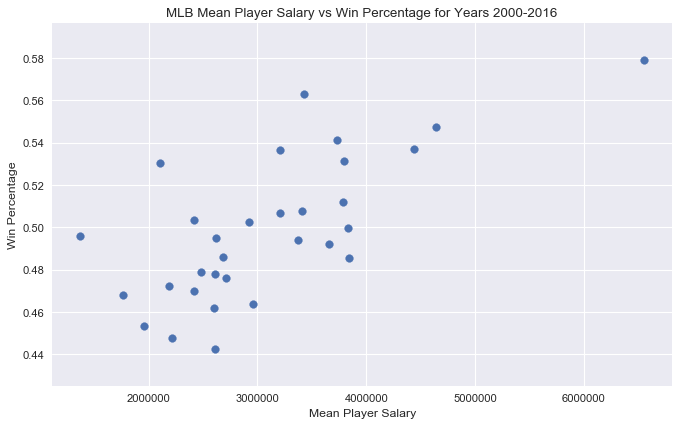

In [12]:
# A scatter plot of the relationship between mean player salary and win percentage.
fig=plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.title('MLB Mean Player Salary vs Win Percentage for Years {}-{}'.format(start, end))
plt.xlabel('Mean Player Salary')
plt.ylabel('Win Percentage')
plt.scatter(salaries, win_pct)

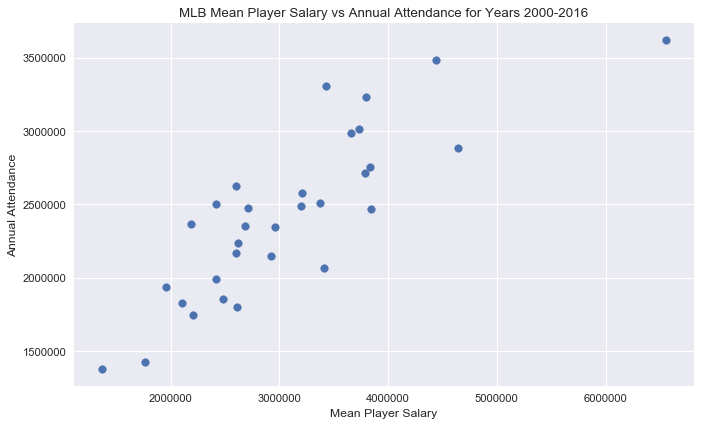

In [13]:
# A scatter plot of the relationship between mean player salary and annual attendance.
fig=plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.title('MLB Mean Player Salary vs Annual Attendance for Years {}-{}'.format(start, end))
plt.xlabel('Mean Player Salary')
plt.ylabel('Annual Attendance')
plt.scatter(salaries, attendance)

#### For reference, the following represent how to interpret correlation coefficients: 
* 0, no linear relationship
* 0.3, weak positive linear relationship
* 0.5, moderate positive relationship
* 0.7, strong positive relationship
* 1.0, perfect linear relationship

In [14]:
pearsons_coeff = str(np.corrcoef(salaries, win_pct)[0,1])[:5]
print('The Pearson correlation coefficient between average player salary and win percentage is:', pearsons_coeff)

The Pearson correlation coefficient between average player salary and win percentage is: 0.697


In [15]:
pearsons_coeff = str(np.corrcoef(salaries, attendance)[0,1])[:5]
print('The Pearson correlation coefficient between average player salary and annual attendance is:', pearsons_coeff)

The Pearson correlation coefficient between average player salary and annual attendance is: 0.837
